# This notebook illustrates how to migrate annotations to discrete and continuous annotations and eventually to a CSV file

In this notebook, we will load the TissueTag annotated image of a IBEX protein multiplex imaging. 
Then we will translate the pixel level annotations to an hexagonal binned grid and measure the minimal euclidean distances to the annotations. 
Finally we will migrate annotations to single cell segmentation and print some plots and save the output as a CSV table.

#### init and load image

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tissue_tag as tt
import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Load image and define annotation names and colors 

In [2]:
# set path
path_to_tissue_tag =  # path to tissue tag main folder (e.g. c:/Users/John/Downloads/TissueTag)
path = path_to_tissue_tag + '/data/tissue_tag_minimal_example_ibex/' 

## load annotations

In [3]:
# load tissue annotations from TissueTag and migrate annotation to a 15um hexagonal grid and outputs the coordinates in ppm=1 
df_anno = tt.anno_to_grid(
    folder=path+'/tissue_annotations/',
    file_name = 'annotations',
    spot_diameter = 15,
    load_colors=True,
)

loaded annotation image - annotations size - (2704, 3948)
loaded annotations
{1: 'unassigned', 2: 'Artifacts', 3: 'Medulla', 4: 'Cortex', 5: 'Edge', 6: 'HS', 7: 'Vessels', 8: 'PVS', 9: 'Other'}
loaded ppm
{'ppm': 1}
loaded color annotations
{'unassigned': 'yellow', 'Artifacts': 'black', 'Medulla': 'green', 'Cortex': 'cyan', 'Edge': 'brown', 'HS': 'magenta', 'Vessels': 'blue', 'PVS': 'red', 'Other': 'orange'}
generating grid with spot size - 15, with resolution of - 1 ppm
annotations


47520it [00:07, 5965.69it/s]


## move annotation and distances to cells (or anything that has xy coordinates)  

In [4]:
# here we calculate the relative distances of each spot in the grid to the closest corresponding spot from all annotations
print('calculating distances')
tt.dist2cluster_fast(
    df=df_anno,
    annotation='annotations',
    KNN=5
    ) # calculate minimum median distance of each spot to clusters with KNN

calculating distances
calculating distance matrix with cKDTree
Artifacts
Cortex
Edge
HS
Medulla
PVS
unassigned


{'Artifacts': array([2315.00748825, 2300.22106898, 2285.43662829, ..., 3544.00080682,
        3545.3229956 , 3546.70758858]),
 'Cortex': array([1016.35699138, 1007.63180605,  998.6709317 , ...,  595.60986541,
         609.6824886 ,  623.79502439]),
 'Edge': array([1062.90824688, 1052.78203924, 1042.77152988, ...,  564.30009837,
         578.39989743,  592.54047575]),
 'HS': array([1134.69941002, 1129.90924996, 1124.96080868, ...,  987.48629925,
         999.92633104, 1012.34839921]),
 'Medulla': array([1030.16589249, 1023.73278009, 1017.47827067, ...,  891.07728575,
         903.19252956,  915.39096345]),
 'PVS': array([1624.68978572, 1609.88395661, 1595.08060219, ...,  925.96741039,
         937.55870072,  949.24331194]),
 'unassigned': array([17.69869493, 12.67814449, 12.67814453, ..., 12.67818034,
        12.67815865, 17.69867945])}

Calculate morphological axes 

In [5]:
# axis calculations based on 3 landmarks  - this axis is good to capture the entire thymus 
anno = 'annotations'
structure = ['Edge','Cortex','Medulla']
w = [0.2,0.8]
df_anno = tt.calculate_axis_3p(df_anno, anno=anno, structure=structure, output_col='cma_3p', w=w)

# axis calculations based on 2 landmarks - this axis is good to capture the location within the cortex
anno = 'annotations'
structure = ['Edge','Medulla']
df_anno = tt.calculate_axis_2p(df_anno, anno=anno, structure=structure, output_col='cma_2p')

In [6]:
df_anno = df_anno[df_anno['annotations']!='unassigned']
df_anno

x            y annotations  annotations_number  \
index                                                             
123      15.000000  1852.441284      Cortex                   4   
124      15.000000  1867.379883      Cortex                   4   
125      15.000000  1882.318481      Cortex                   4   
126      15.000000  1897.256958      Cortex                   4   
127      15.000000  1912.195557      Cortex                   4   
...            ...          ...         ...                 ...   
47293  3903.206055  2009.326782        Edge                   5   
47294  3903.206055  2024.265381        Edge                   5   
47295  3903.206055  2039.203857        Edge                   5   
47296  3903.206055  2054.142578        Edge                   5   
47297  3903.206055  2069.081055        Edge                   5   

       L2_dist_annotations_Artifacts  L2_dist_annotations_Cortex  \
index                                                              
123                       551.189167                   15.078327   
124                       538.696964                   12.678169   
125                       526.331943                   12.678145   
126                       514.103342                   12.678134   
127                       502.020878                   12.678145   
...                              ...                         ...   
47293                    3518.502436                   39.228371   
47294                    3517.043541                   43.289546   
47295                    3515.647527                   49.973294   
47296                    3514.314436                   58.069119   
47297                    3513.044382                   67.040118   

       L2_dist_annotations_Edge  L2_dist_annotations_HS  \
index                                                     
123                   76.055345              454.584928   
124                   89.492116              456.937798   
125                  102.945836              459.764309   
126                  115.842175              463.055737   
127                  128.742885              466.802280   
...                         ...                     ...   
47293                 12.604466              531.810969   
47294                 12.604455              537.030101   
47295                 12.604491              542.610346   
47296                 12.641361              548.540827   
47297                 15.065734              554.810129   

       L2_dist_annotations_Medulla  L2_dist_annotations_PVS  \
index                                                         
123                     167.605871               276.936648   
124                     168.138732               285.295346   
125                     169.729442               293.469257   
126                     172.342380               300.484162   
127                     175.121809               303.626495   
...                            ...                      ...   
47293                   460.231697               516.311435   
47294                   464.957776               521.386672   
47295                   469.797667               526.833991   
47296                   474.809326               532.642272   
47297                   480.231987               538.799823   

       L2_dist_annotations_unassigned    cma_3p    cma_2p  
index                                                      
123                         44.815576 -0.534121 -0.375729  
124                         59.754175 -0.537450 -0.305269  
125                         74.692773 -0.532653 -0.244920  
126                         89.631250 -0.529822 -0.196056  
127                        104.569849 -0.527845 -0.152630  
...                               ...       ...       ...  
47293                       35.768923 -0.777063 -0.946686  
47294                       35.757506 -0.773519 -0.947213  
47295                       32.683823 -0.765600 -0.947743  
47296       

Load single cell reference (IBEX segmentation)

In [7]:
# read cell segmentation
df_cells = pd.read_csv(path+'sample_05_xy.csv')
# correct coordinates to pixel space 
ppm_cells = 3.5198
df_cells['y'] = df_cells['centroid-0']
df_cells['x'] = df_cells['centroid-1']
df_cells

Unnamed: 0   centroid-0   centroid-1            y            x
0                0    21.049881  4322.589074    21.049881  4322.589074
1                1    40.732535  4327.992016    40.732535  4327.992016
2                2    40.332468  4362.800000    40.332468  4362.800000
3                3    45.308157  4345.679758    45.308157  4345.679758
4                4    52.028721  4311.151436    52.028721  4311.151436
...            ...          ...          ...          ...          ...
112168      112168  9466.446809  3947.117021  9466.446809  3947.117021
112169      112169  9466.835366  4922.692073  9466.835366  4922.692073
112170      112170  9467.217514  6774.098870  9467.217514  6774.098870
112171      112171  9466.623288  2953.948630  9466.623288  2953.948630
112172      112172  9466.861111  6528.008333  9466.861111  6528.008333

[112173 rows x 5 columns]

Make sure the coordinate systems are aligned, e.g., axes are not flipped and the resolution is matched.


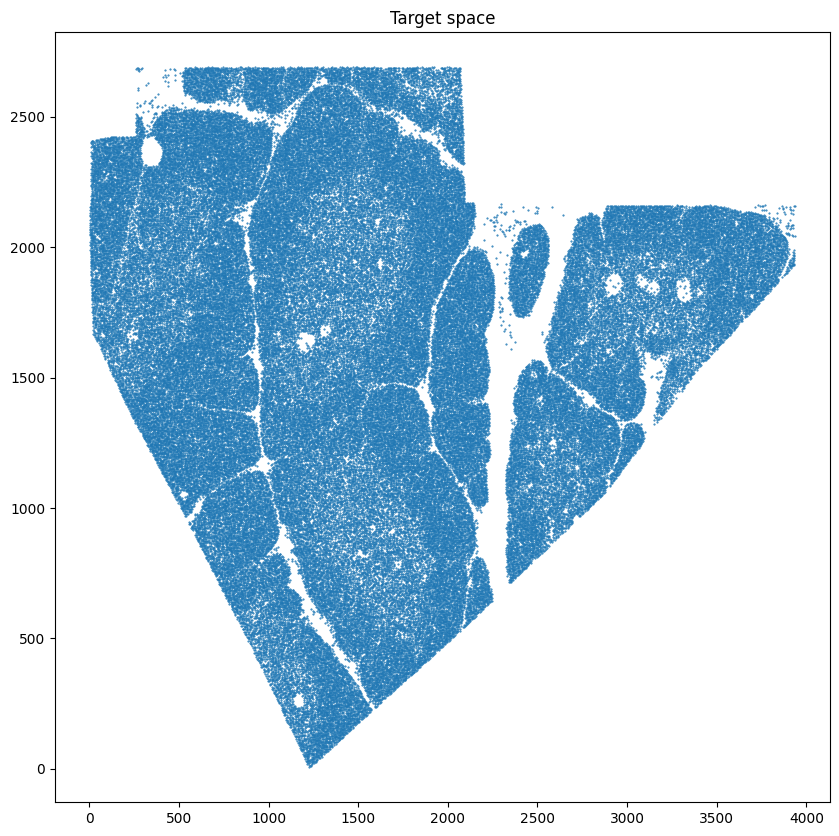

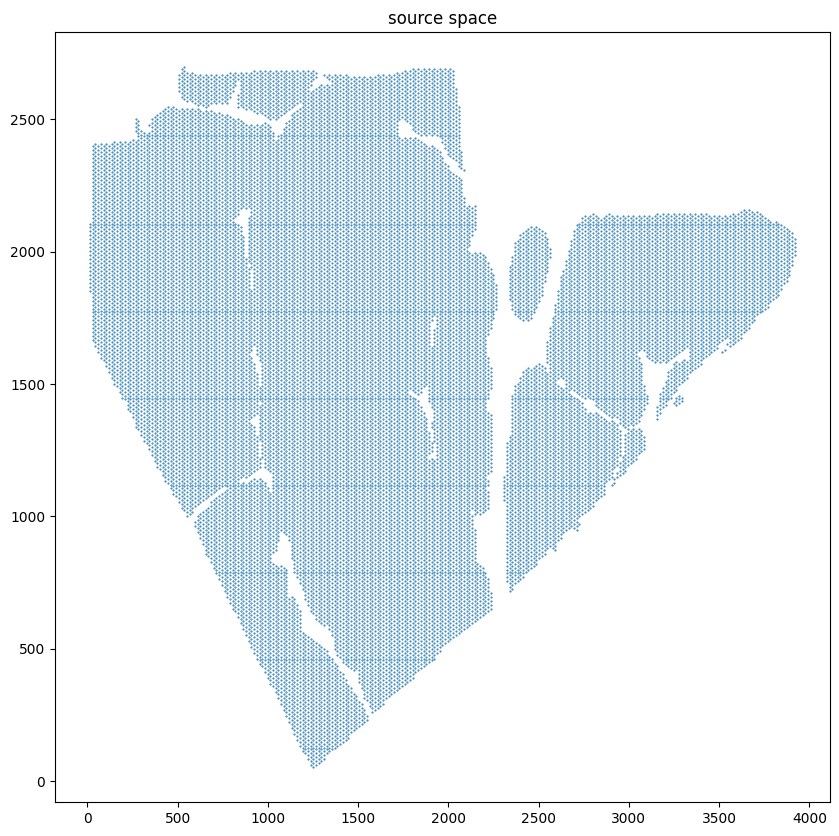

Migrating source annotation - annotations to target space.
Migrating source annotation - annotations_number to target space.
Migrating source annotation - L2_dist_annotations_Artifacts to target space.
Migrating source annotation - L2_dist_annotations_Cortex to target space.
Migrating source annotation - L2_dist_annotations_Edge to target space.
Migrating source annotation - L2_dist_annotations_HS to target space.
Migrating source annotation - L2_dist_annotations_Medulla to target space.
Migrating source annotation - L2_dist_annotations_PVS to target space.
Migrating source annotation - L2_dist_annotations_unassigned to target space.
Migrating source annotation - cma_3p to target space.
Migrating source annotation - cma_2p to target space.


Unnamed: 0   centroid-0   centroid-1            y            x  \
0                0    21.049881  4322.589074    21.049881  4322.589074   
1                1    40.732535  4327.992016    40.732535  4327.992016   
2                2    40.332468  4362.800000    40.332468  4362.800000   
3                3    45.308157  4345.679758    45.308157  4345.679758   
4                4    52.028721  4311.151436    52.028721  4311.151436   
...            ...          ...          ...          ...          ...   
112168      112168  9466.446809  3947.117021  9466.446809  3947.117021   
112169      112169  9466.835366  4922.692073  9466.835366  4922.692073   
112170      112170  9467.217514  6774.098870  9467.217514  6774.098870   
112171      112171  9466.623288  2953.948630  9466.623288  2953.948630   
112172      112172  9466.861111  6528.008333  9466.861111  6528.008333   

       annotations  annotations_number  L2_dist_annotations_Artifacts  \
0             None                 NaN                            NaN   
1           Cortex                 4.0                    2421.735640   
2           Cortex                 4.0                    2421.735640   
3           Cortex                 4.0                    2421.735640   
4           Cortex                 4.0                    2421.735640   
...            ...                 ...                            ...   
112168      Cortex                 4.0                     792.862763   
112169      Cortex                 4.0                    1042.428381   
112170      Cortex                 4.0                    1554.311995   
112171        Edge                 5.0                     535.154002   
112172     Medulla                 3.0                    1495.993828   

        L2_dist_annotations_Cortex  L2_dist_annotations_Edge  \
0                              NaN                       NaN   
1                        15.013141                340.954864   
2                        15.013141                340.954864   
3                        15.013141                340.954864   
4                        15.013141                340.954864   
...                            ...                       ...   
112168                   15.034479                109.426756   
112169                   15.034390                 38.947417   
112170                   33.511286                225.787349   
112171                   42.534275                 15.013206   
112172                   82.366959                206.400308   

        L2_dist_annotations_HS  L2_dist_annotations_Medulla  \
0                          NaN                          NaN   
1                   209.372200                   108.666527   
2                   209.372200                   108.666527   
3                   209.372200                   108.666527   
4                   209.372200                   108.666527   
...                        ...                          ...   
112168              674.319539                   487.919868   
112169              624.887079                   332.916042   
112170              679.180505                    23.011212   
112171              598.628421                   502.274599   
112172              656.407210                    15.013096   

        L2_dist_annotations_PVS  L2_dist_annotations_unassigned    cma_3p  \
0                           NaN                             NaN       NaN   
1                   1126.521077                       20.432520 -0.422651   
2                   1126.521077                       20.432520 -0.422651   
3                   1126.521077                       20.432520 -0.422651   
4                   1126.521077                       20.432520 -0.422651   
...                         ...                             ...       ...   
112168               503.160461                       22.979728 -0.600491   
112169               467.279196                       20.401132 -0.642270   
112170               63

In [8]:
df_cells = tt.map_annotations_to_target(                            
    df_target=df_cells,  
    df_source=df_anno,
    ppm_target= ppm_cells,
    plot=True,
)
df_cells

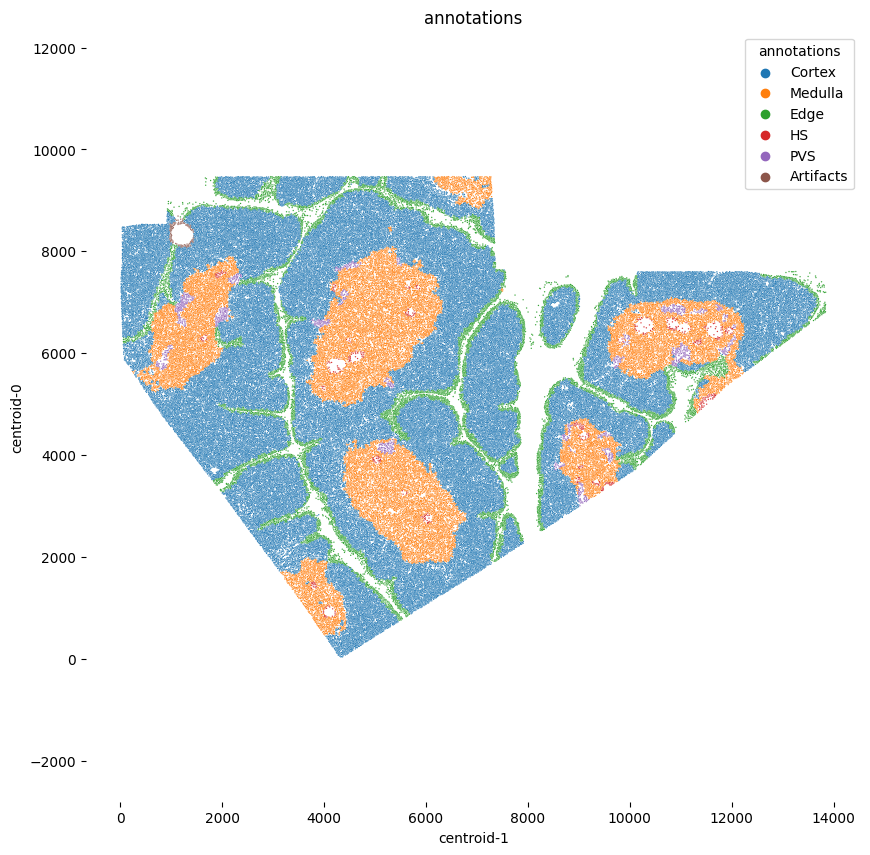

In [9]:
plt.figure(dpi=100, figsize=[10,10])
sns.scatterplot(x='centroid-1', y='centroid-0', data=df_cells, hue='annotations', palette='tab10', s=1)
plt.grid(False)
plt.title('annotations')
plt.axis('equal')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [10]:


def plot_cont(data, x_col='centroid-1', y_col='centroid-0', color_col='L2_dist_annotations_Edge', 
               cmap='jet', title='L2_dist_annotations_Edge', s=1, dpi=100, figsize=[10,10]):
    """
    Plots a scatter plot with a colorbar based on the given data and parameters.
    
    Parameters:
    - data: DataFrame containing the data to be plotted.
    - x_col: Column name for the x-axis data.
    - y_col: Column name for the y-axis data.
    - color_col: Column name for the color data.
    - cmap: Colormap for the scatter plot.
    - title: Title for the plot.
    - s: Size of the markers in the scatter plot.
    - dpi: Resolution of the plot.
    - figsize: Size of the figure.
    """
    
    plt.figure(dpi=dpi, figsize=figsize)

    # Create the scatterplot and store in a variable
    scatter = sns.scatterplot(x=x_col, y=y_col, data=data, 
                              c=data[color_col], cmap=cmap, s=s, 
                              legend=False)  # turn off the default legend

    plt.grid(False)
    plt.axis('tight')
    plt.title(title)
    for pos in ['right', 'top', 'bottom', 'left']:
        plt.gca().spines[pos].set_visible(False)

    # Add colorbar
    norm = plt.Normalize(data[color_col].min(), data[color_col].max())
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, label=title, aspect=30)
    cbar.ax.set_position([0.85, 0.25, 0.05, 0.5])  # adjust the 'bottom' and 'height' values to your liking
    
    plt.show()


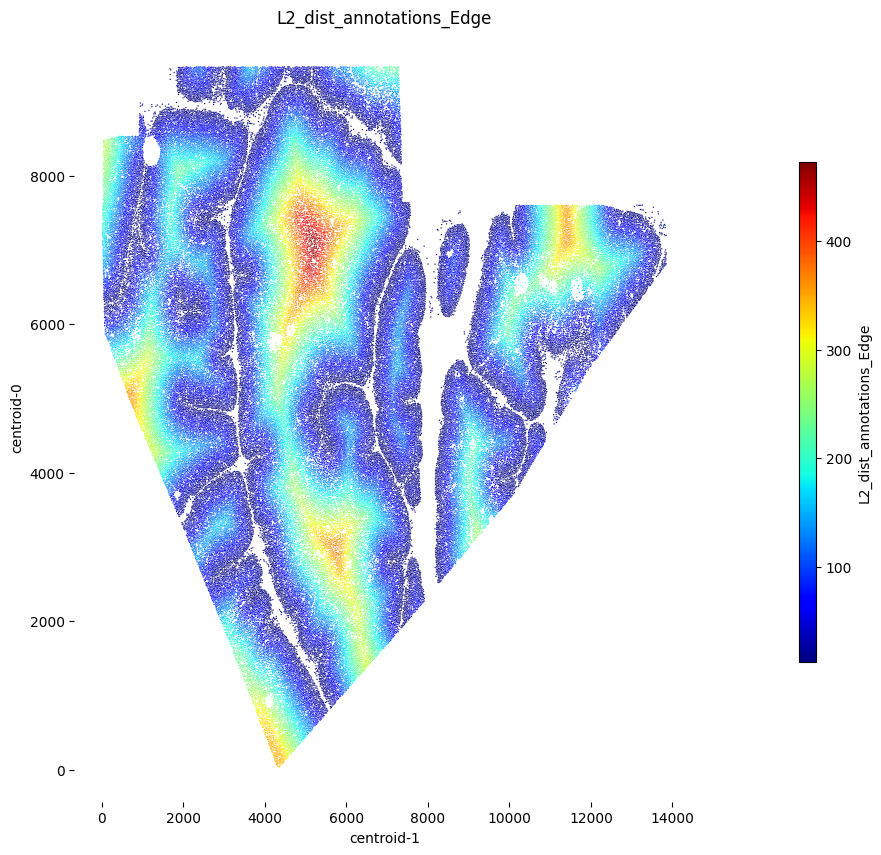

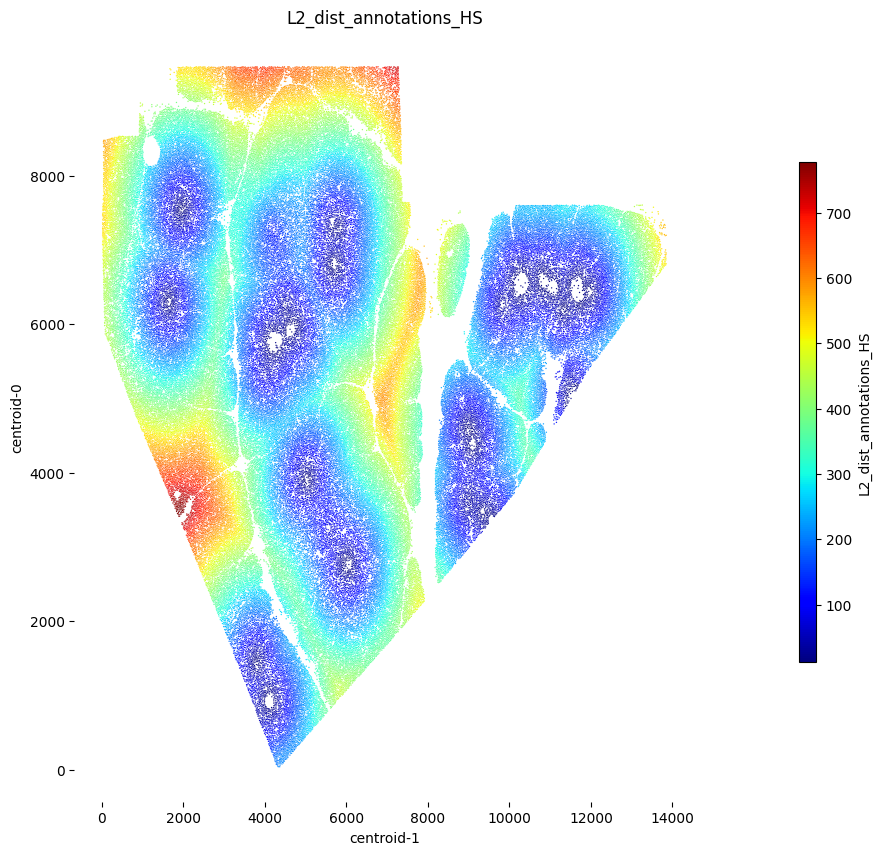

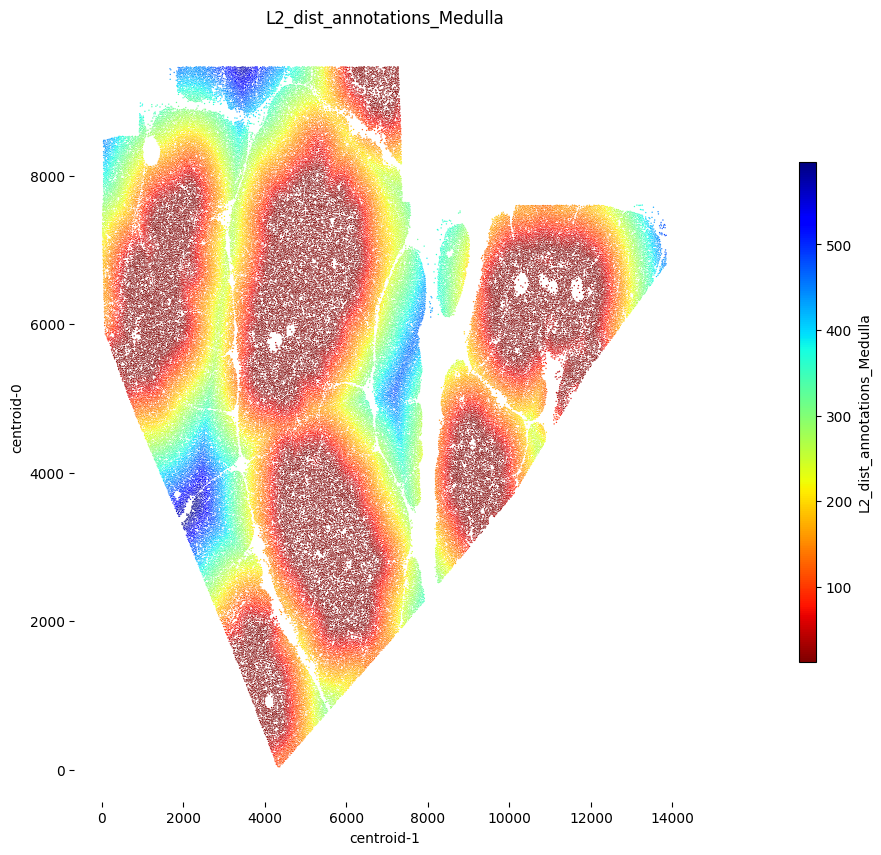

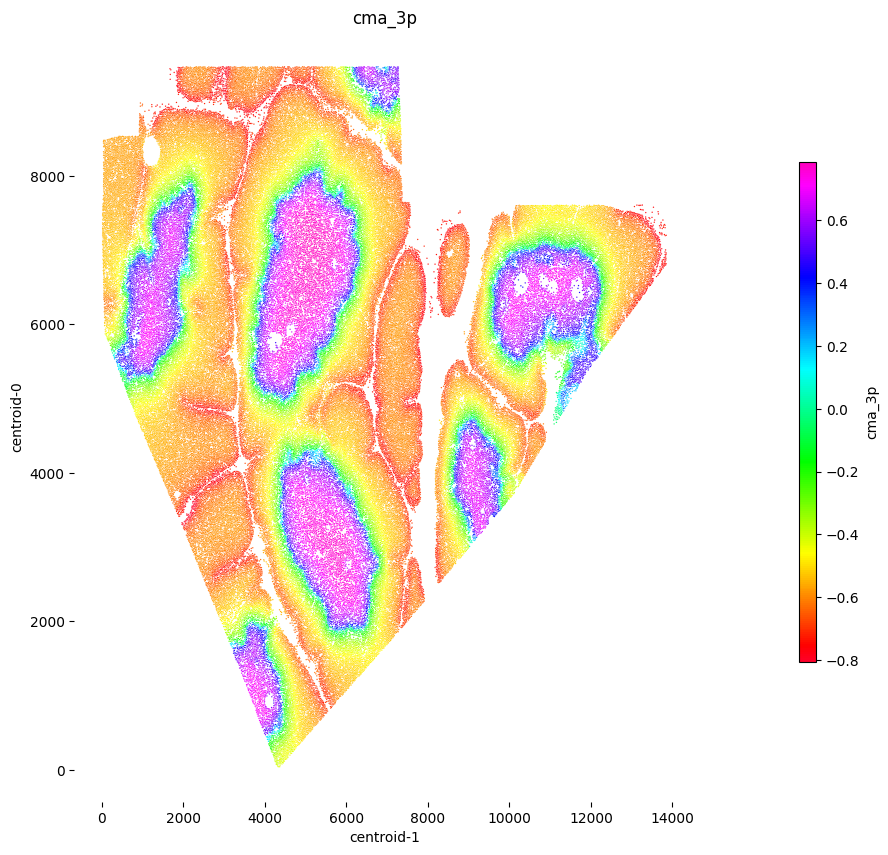

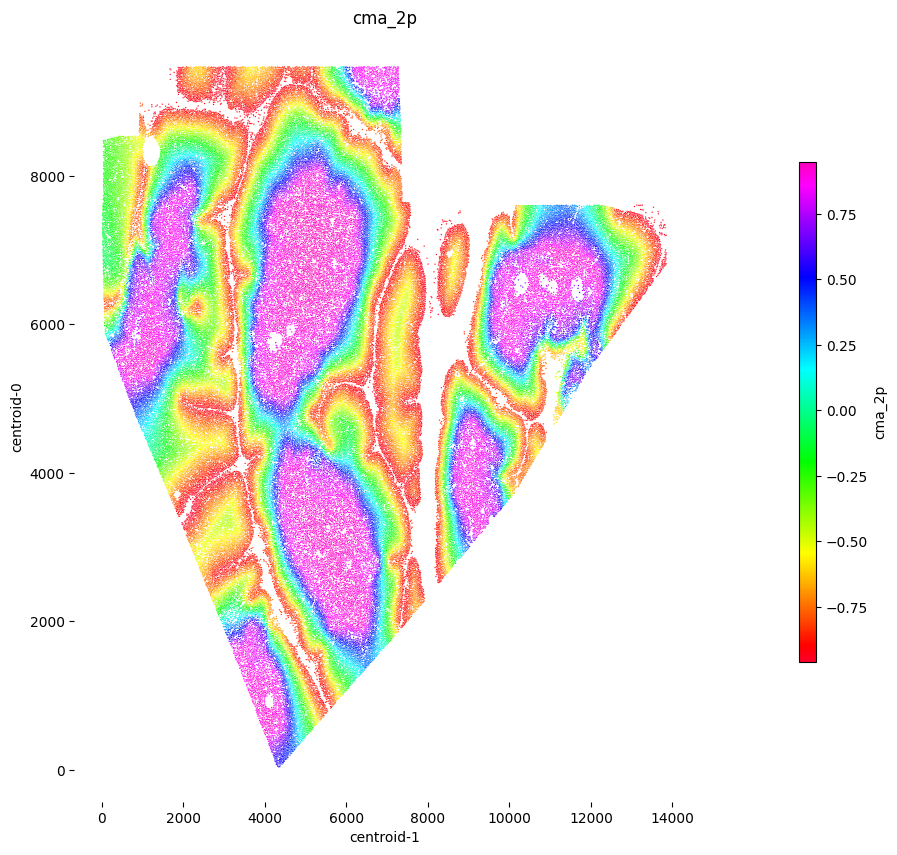

In [11]:
# plot the rest of the annotations
plot_cont(df_cells, x_col='centroid-1', y_col='centroid-0', color_col='L2_dist_annotations_Edge', cmap='jet', title='L2_dist_annotations_Edge', s=1, dpi=100, figsize=[10,10])
plot_cont(df_cells, x_col='centroid-1', y_col='centroid-0', color_col='L2_dist_annotations_HS', cmap='jet', title='L2_dist_annotations_HS', s=1, dpi=100, figsize=[10,10])
plot_cont(df_cells, x_col='centroid-1', y_col='centroid-0', color_col='L2_dist_annotations_Medulla', cmap='jet_r', title='L2_dist_annotations_Medulla', s=1, dpi=100, figsize=[10,10])
plot_cont(df_cells, x_col='centroid-1', y_col='centroid-0', color_col='cma_3p', cmap='gist_rainbow', title='cma_3p', s=1, dpi=100, figsize=[10,10])
plot_cont(df_cells, x_col='centroid-1', y_col='centroid-0', color_col='cma_2p', cmap='gist_rainbow', title='cma_2p', s=1, dpi=100, figsize=[10,10])
